<a href="https://colab.research.google.com/github/jedrekf1/PUMprojekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("winequality-red.csv", delimiter=";")

In [11]:
df.head()

fixed acidity  volatile acidity citric acid residual sugar chlorides  \
0            7.4              0.70           0            1.9     0.076   
1            7.8              0.88           0            2.6     0.098   
2            7.8              0.76        0.04            2.3     0.092   
3           11.2              0.28        0.56            1.9     0.075   
4            7.4              0.70           0            1.9     0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [66]:
df.shape

(1359, 12)

In [63]:
df = df.drop_duplicates()

In [62]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 4
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [67]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar           object
chlorides                object
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [65]:
df.dropna(inplace=True)

In [68]:
df['citric acid'] = pd.to_numeric(df['citric acid'], errors='coerce')
df['residual sugar'] = pd.to_numeric(df['residual sugar'], errors='coerce')
df['chlorides'] = pd.to_numeric(df['chlorides'], errors='coerce')

In [69]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.253411     0.666182   
volatile acidity          -0.253411          1.000000    -0.550425   
citric acid                0.666182         -0.550425     1.000000   
residual sugar             0.112333         -0.006550     0.146102   
chlorides                  0.085293          0.055226     0.209660   
free sulfur dioxide       -0.129388         -0.030577    -0.046702   
total sulfur dioxide      -0.104997          0.069971     0.047136   
density                    0.669713          0.024420     0.358857   
pH                        -0.686394          0.244932    -0.548596   
sulphates                  0.190340         -0.256204     0.325469   
alcohol                   -0.060207         -0.199022     0.104859   
quality                    0.120336         -0.395755     0.227198   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.112333   0.085293            -0.129388   
volatile acidity           -0.006550   0.055226            -0.030577   
citric acid                 0.146102   0.209660            -0.046702   
residual sugar              1.000000   0.028500             0.145098   
chlorides                   0.028500   1.000000             0.004476   
free sulfur dioxide         0.145098   0.004476             1.000000   
total sulfur dioxide        0.202511   0.045192             0.635036   
density                     0.324214   0.194080            -0.021971   
pH                         -0.080907  -0.271401             0.049387   
sulphates                  -0.009333   0.394401             0.051689   
alcohol                     0.068234  -0.225259            -0.068924   
quality                     0.015454  -0.131157            -0.044737   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.104997  0.669713 -0.686394   0.190340   
volatile acidity                  0.069971  0.024420  0.244932  -0.256204   
citric acid                       0.047136  0.358857 -0.548596   0.325469   
residual sugar                    0.202511  0.324214 -0.080907  -0.009333   
chlorides                         0.045192  0.194080 -0.271401   0.394401   
free sulfur dioxide               0.635036 -0.021971  0.049387   0.051689   
total sulfur dioxide              1.000000  0.077584 -0.076759   0.036838   
density                           0.077584  1.000000 -0.354116   0.147806   
pH                               -0.076759 -0.354116  1.000000  -0.213666   
sulphates                         0.036838  0.147806 -0.213666   1.000000   
alcohol                          -0.215849 -0.503279  0.212378   0.090623   
quality                          -0.177605 -0.182975 -0.056243   0.248144   

                       alcohol   quality  
fixed acidity        -0.060207  0.120336  
volatile acidity     -0.199022 -0.395755  
citric acid           0.104859  0.227198  
residual sugar        0.068234  0.015454  
chlorides            -0.225259 -0.131157  
free sulfur dioxide  -0.068924 -0.044737  
total sulfur dioxide -0.215849 -0.177605  
density              -0.503279 -0.182975  
pH                    0.212378 -0.056243  
sulphates             0.090623  0.248144  
alcohol               1.000000  0.479960  
quality               0.479960  1.000000

<Axes: >

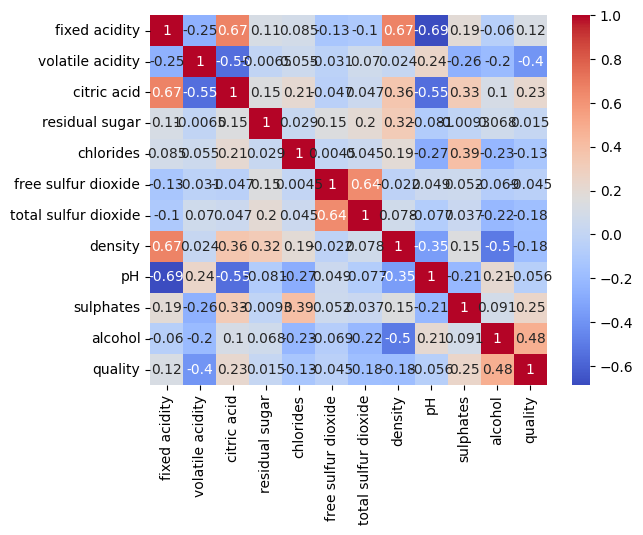

In [70]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

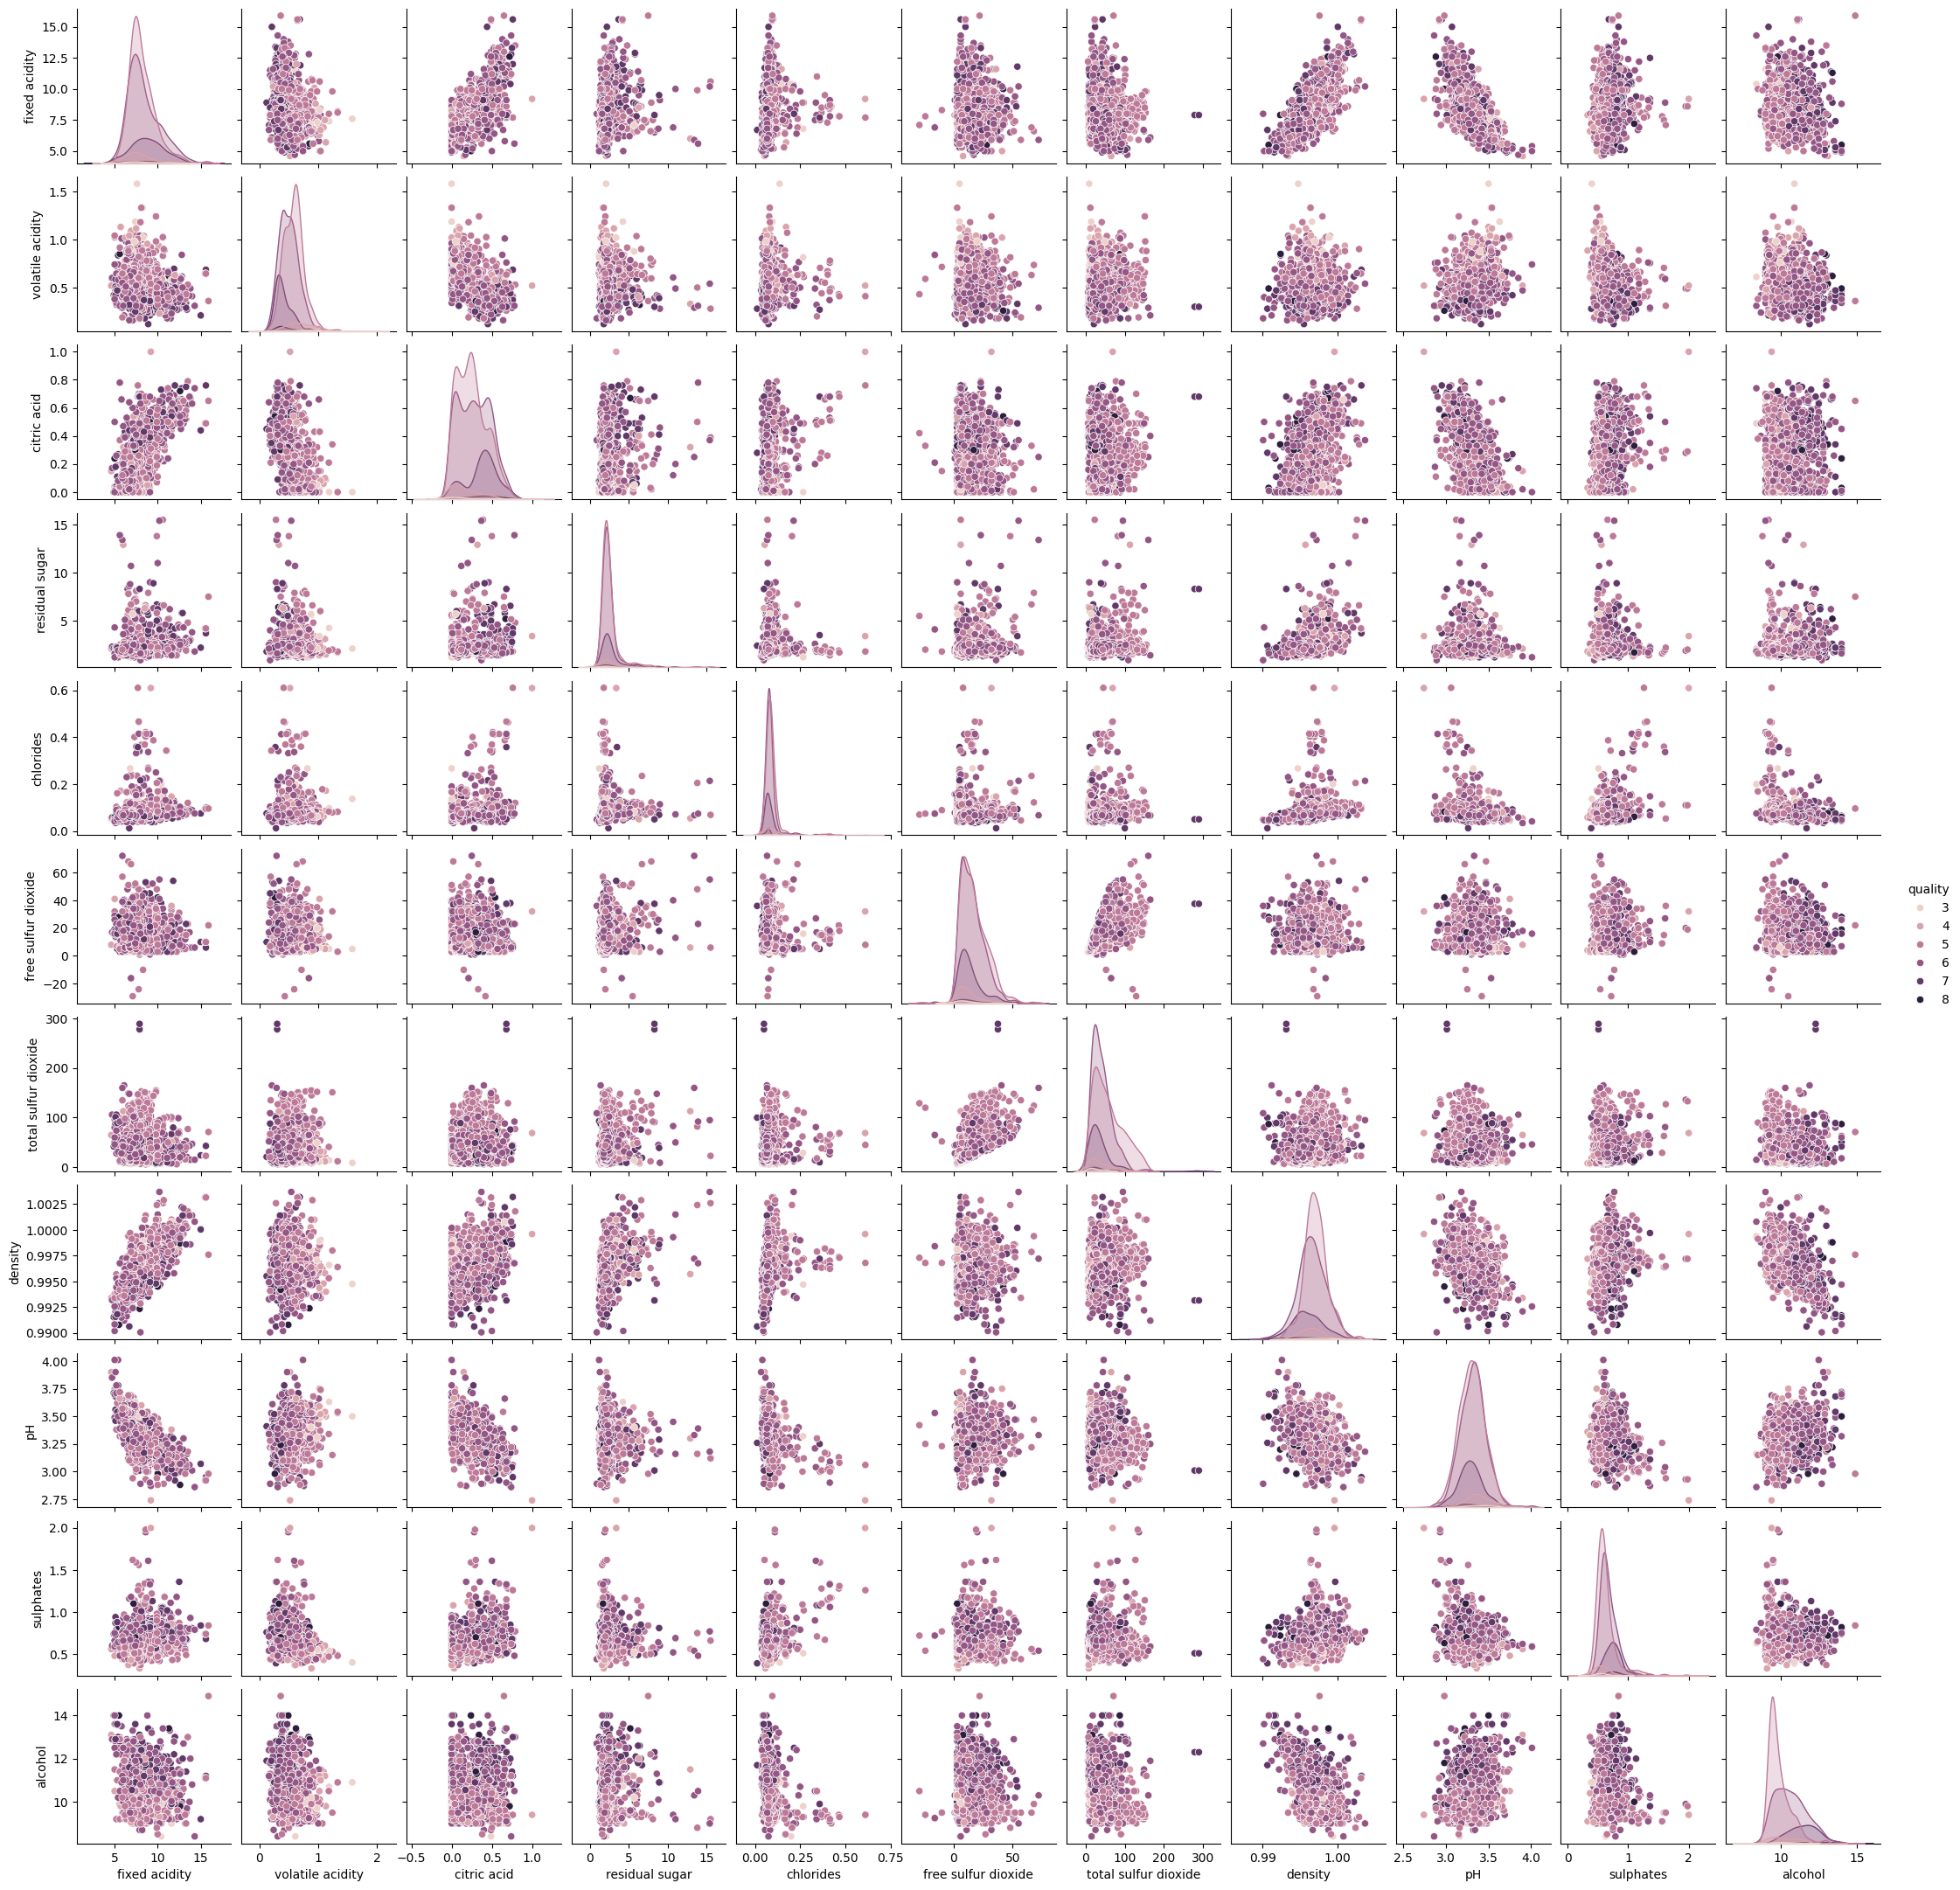

In [71]:
sns.pairplot(df, hue='quality', height=2)

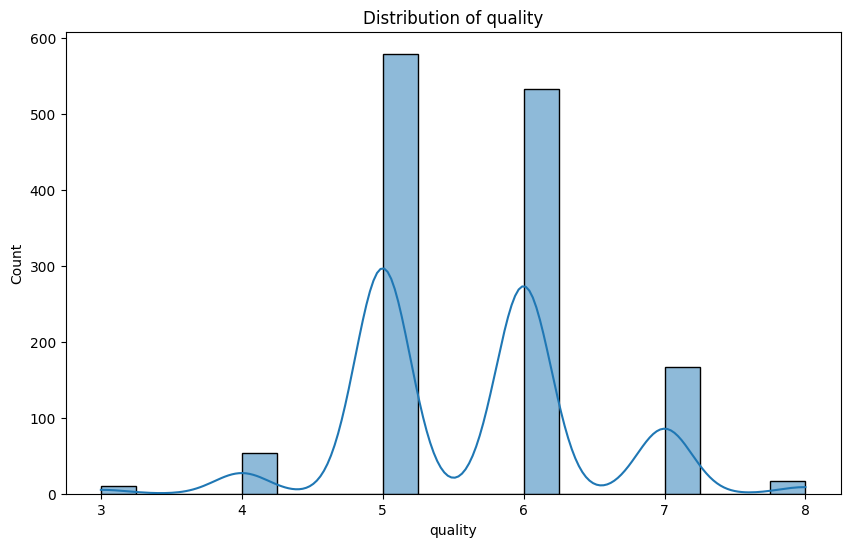

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], bins=20, kde=True)
plt.xlabel('quality')
plt.ylabel('Count')
plt.title('Distribution of quality')
plt.show()

In [76]:
df = df.abs()

In [78]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [77]:
df.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [79]:
df.mean()

fixed acidity            8.313760
volatile acidity         0.529349
citric acid              0.273031
residual sugar           2.522091
chlorides                0.088162
free sulfur dioxide     15.878587
total sulfur dioxide    46.870861
density                  0.996712
pH                       3.309536
sulphates                0.658786
alcohol                 10.430623
quality                  5.621781
dtype: float64

In [80]:
df1 = df.copy()
df1 = df1.drop_duplicates()
df1.shape

(1357, 12)

In [81]:
for column in df1.columns:
  q1 = df1[column].quantile(0.25)
  q3 = df1[column].quantile(0.75)
  iqr = q3 - q1

  df1 = df1.drop(df1.loc[df1[column] > q3 + 10*iqr].index)
  df1 = df1.drop(df1.loc[df1[column] < q1 - 10*iqr].index)

df1.shape

(1328, 12)

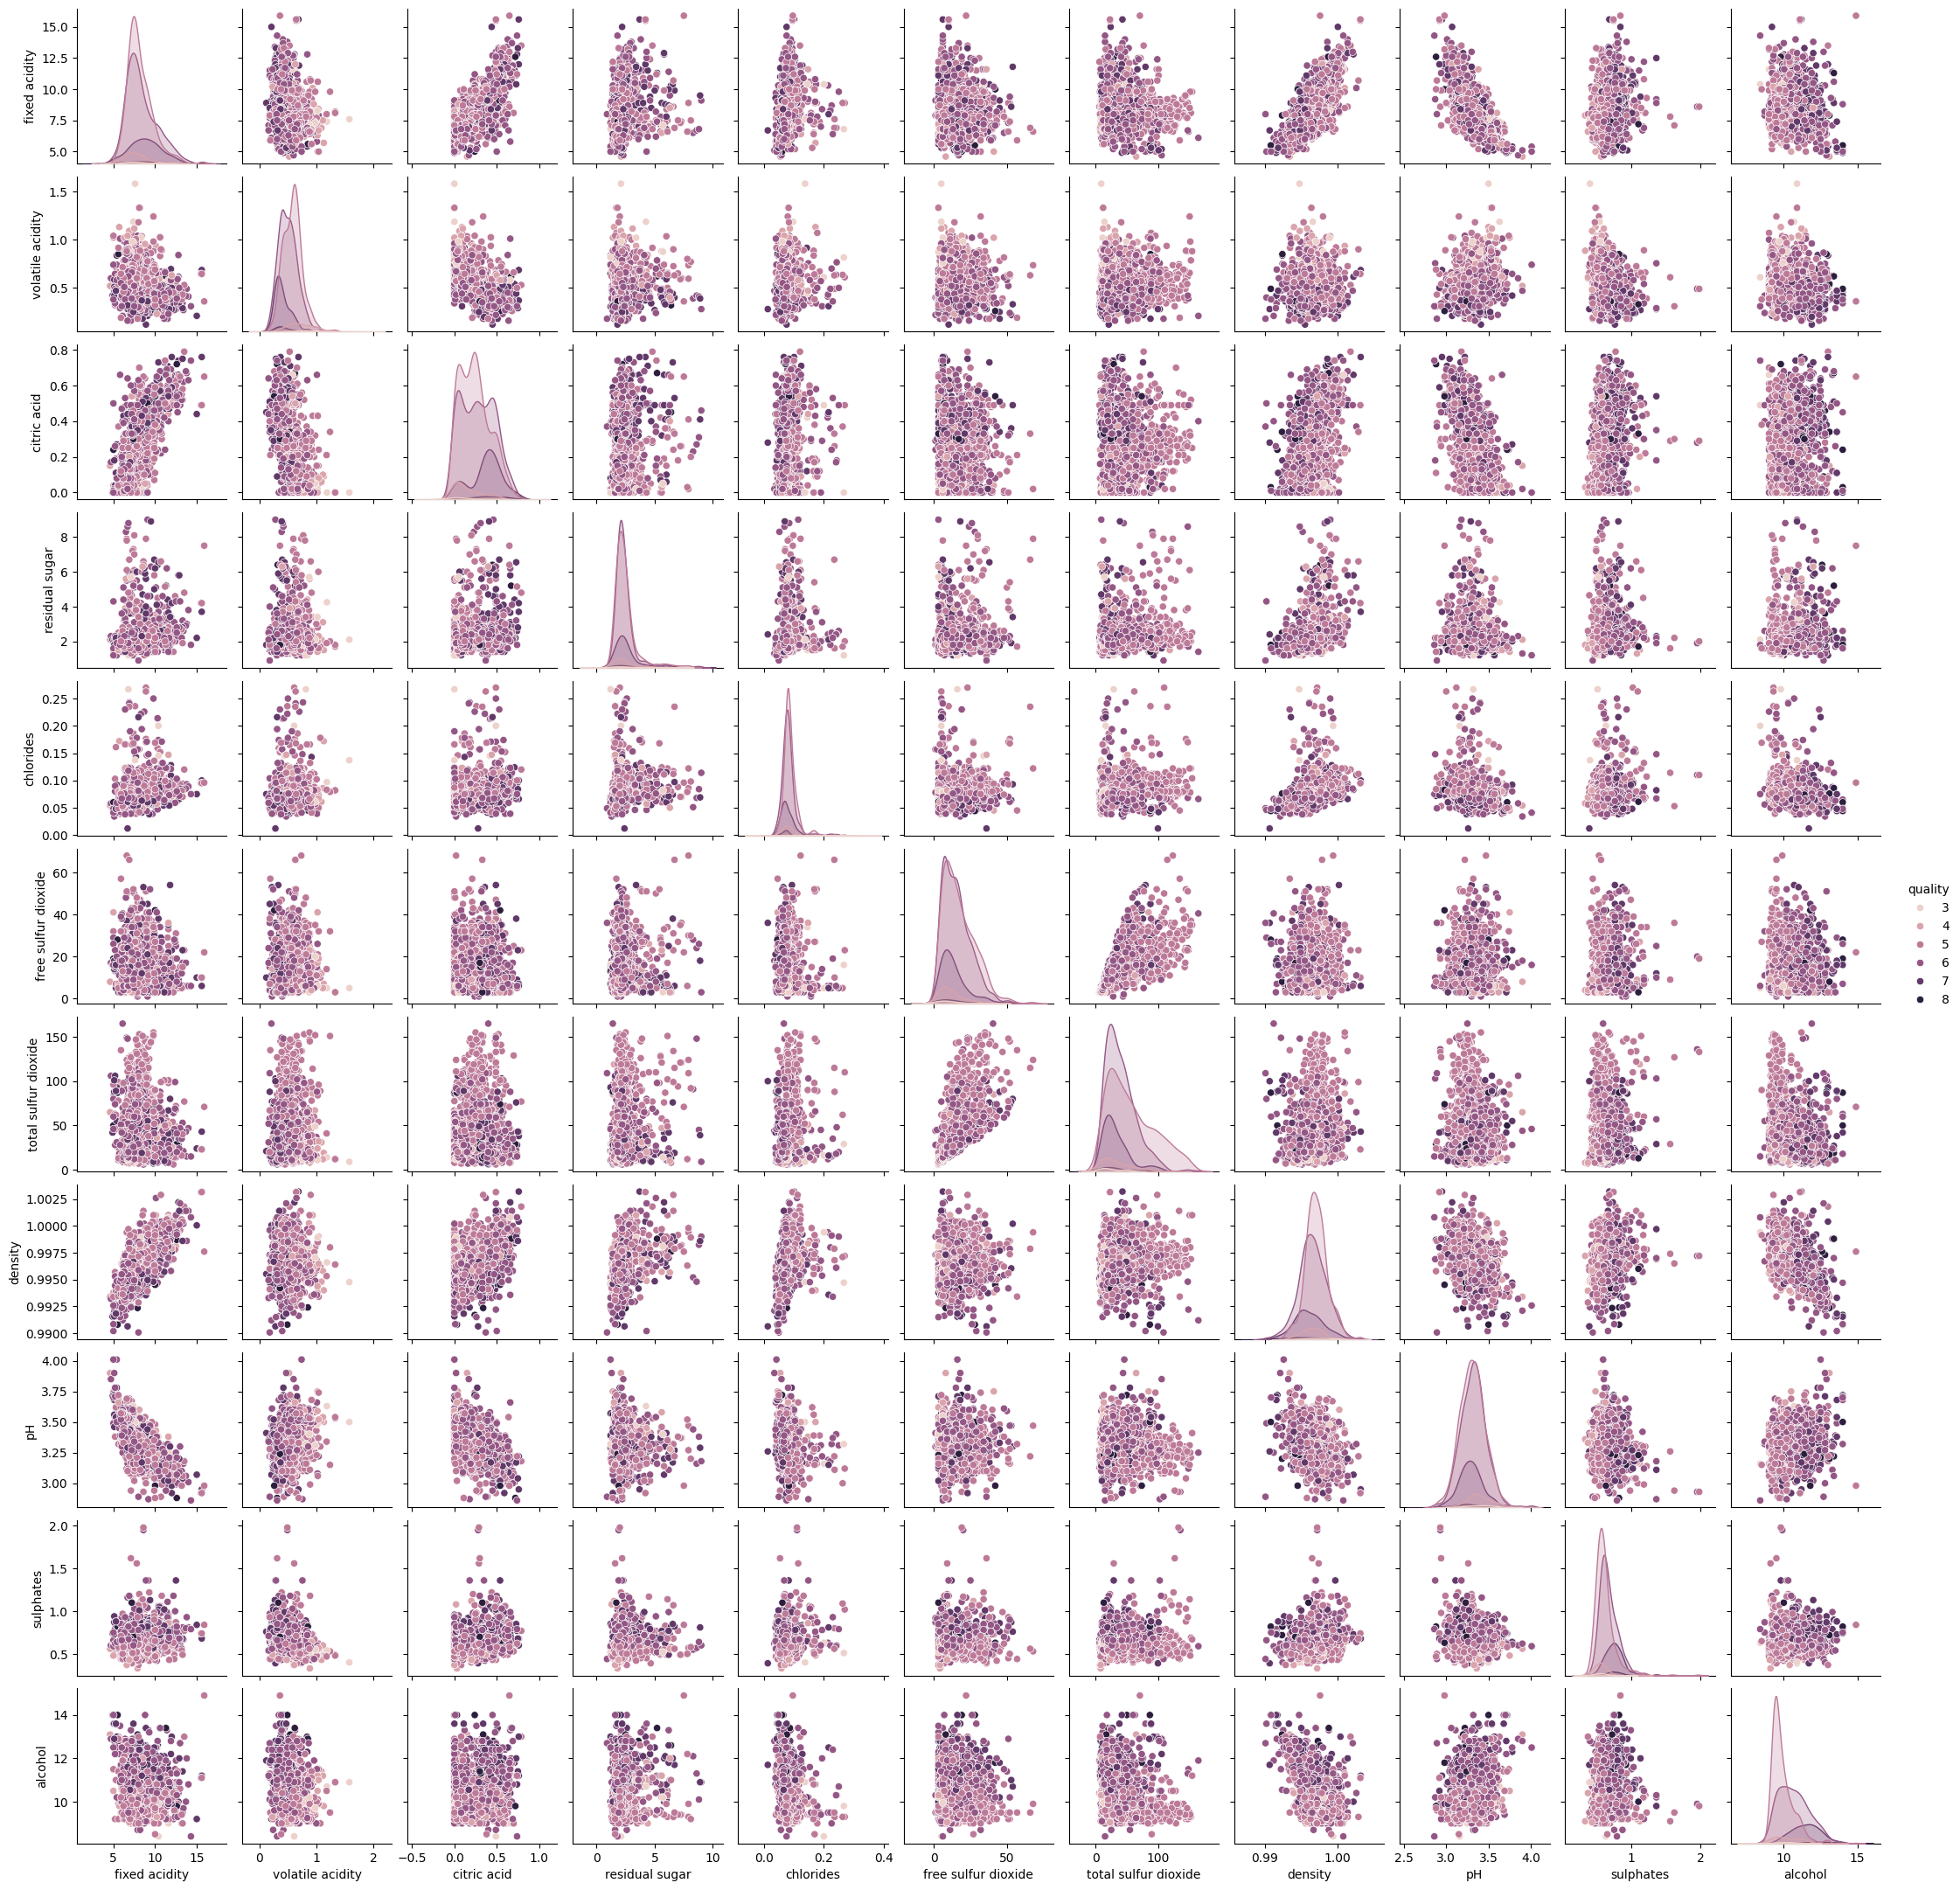

In [93]:
sns.pairplot(df1, hue='quality', height=2)

In [84]:
df1.max()

fixed acidity            15.9000
volatile acidity          1.5800
citric acid               0.7900
residual sugar            9.0000
chlorides                 0.2700
free sulfur dioxide      68.0000
total sulfur dioxide    289.0000
density                   1.0032
pH                        4.0100
sulphates                 1.9800
alcohol                  14.9000
quality                   8.0000
dtype: float64

In [92]:
df1['total sulfur dioxide'].sort_values()

915       6.0
979       6.0
1287      7.0
1014      7.0
813       7.0
        ...  
672     151.0
684     152.0
109     153.0
651     155.0
354     165.0
Name: total sulfur dioxide, Length: 1326, dtype: float64

In [88]:
df1['free sulfur dioxide'].sort_values()

530      1.0
773      1.0
774      2.0
36       3.0
915      3.0
        ... 
925     53.0
584     54.0
1131    57.0
1558    66.0
396     68.0
Name: free sulfur dioxide, Length: 1328, dtype: float64

In [89]:
df1['fixed acidity'].sort_values()

45       4.6
95       4.7
821      4.9
588      5.0
1270     5.0
        ... 
243     15.0
554     15.5
557     15.6
442     15.6
652     15.9
Name: fixed acidity, Length: 1328, dtype: float64

In [90]:
df1 = df1[df1['total sulfur dioxide'] <= 200]

In [91]:
df1.shape

(1326, 12)